# EDA and initial insights on dataset

In [1]:
import dask.bag as db
import json
import random
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
dataset = db.read_text('../data/arxiv-metadata-oai.json').map(json.loads)

# Take a look at the first record to see what we're working with
dataset.take(1)

({'id': '0704.0001',
  'submitter': 'Pavel Nadolsky',
  'authors': "C. Bal\\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan",
  'title': 'Calculation of prompt diphoton production cross sections at Tevatron and\n  LHC energies',
  'comments': '37 pages, 15 figures; published version',
  'journal-ref': 'Phys.Rev.D76:013009,2007',
  'doi': '10.1103/PhysRevD.76.013009',
  'report-no': 'ANL-HEP-PR-07-12',
  'categories': 'hep-ph',
  'license': None,
  'abstract': '  A fully differential calculation in perturbative quantum chromodynamics is\npresented for the production of massive photon pairs at hadron colliders. All\nnext-to-leading order perturbative contributions from quark-antiquark,\ngluon-(anti)quark, and gluon-gluon subprocesses are included, as well as\nall-orders resummation of initial-state gluon radiation valid at\nnext-to-next-to-leading logarithmic accuracy. The region of phase space is\nspecified in which the calculation is most reliable. Good agreement is\ndemonstrated with d

In [3]:
# Number of records
num_records = dataset.count().compute()
print(f"Number of records: {num_records}")

# Sample record to understand attributes and their data types
sample_record = dataset.take(1)[0]
attributes = list(sample_record.keys())
print(f"Attributes in the dataset: {attributes}")

Number of records: 2288300
Attributes in the dataset: ['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi', 'report-no', 'categories', 'license', 'abstract', 'versions', 'update_date', 'authors_parsed']


In [4]:
# Top authors
top_authors = dataset.pluck("authors").frequencies(sort=True).take(10)
print(f"Top 10 authors: {top_authors}")

# Number of unique titles (to check for duplicates)
unique_titles_count = dataset.pluck("title").distinct().count().compute()
print(f"Number of unique titles: {unique_titles_count}")

Top 10 authors: (('CMS Collaboration', 1180), ('ATLAS Collaboration', 1101), ('ALICE Collaboration', 431), ('The BABAR Collaboration, B. Aubert, et al', 263), ('Saharon Shelah', 229), ('Lorenzo Iorio', 226), ('Shahar Hod', 173), ('Miloslav Znojil', 168), ('Ernest Ma (UC Riverside)', 156), ('ZEUS Collaboration', 154))
Number of unique titles: 2284383


In [5]:
# Time span of the dataset
dates = dataset.pluck('update_date').compute()
min_date, max_date = min(dates), max(dates)
print(f"Time span of the dataset: {min_date} to {max_date}")

Time span of the dataset: 2007-05-23 to 2023-07-07


d:\ML-trend-analysis\Scientific-Trend-Analysis\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML-trend-analysis\Scientific-Trend-Analysis\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML-trend-analysis\Scientific-Trend-Analysis\env\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
d:\ML-trend-analysis\Scientific-Trend-Analysis\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed

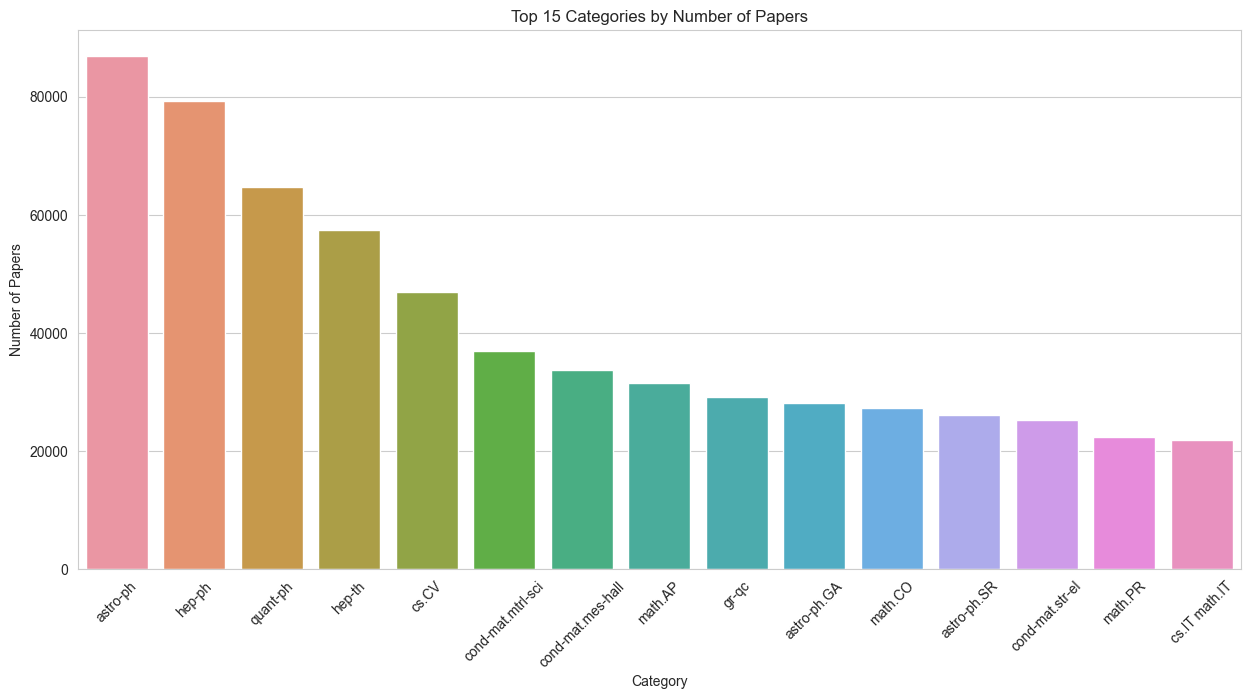

In [6]:
# Setting up the visualization style
sns.set_style("whitegrid")

# 1. Distribution of Categories
category_counts = dataset.pluck("categories").frequencies(sort=True).compute()
categories, counts = zip(*category_counts[:15])  # Considering top 15 for clarity

plt.figure(figsize=(15, 7))
sns.barplot(x=list(categories), y=list(counts))
plt.xticks(rotation=45)
plt.title("Top 15 Categories by Number of Papers")
plt.ylabel("Number of Papers")
plt.xlabel("Category")
plt.savefig("../images/eda/Top15CategoriesInWholeDataset.png")
plt.show()

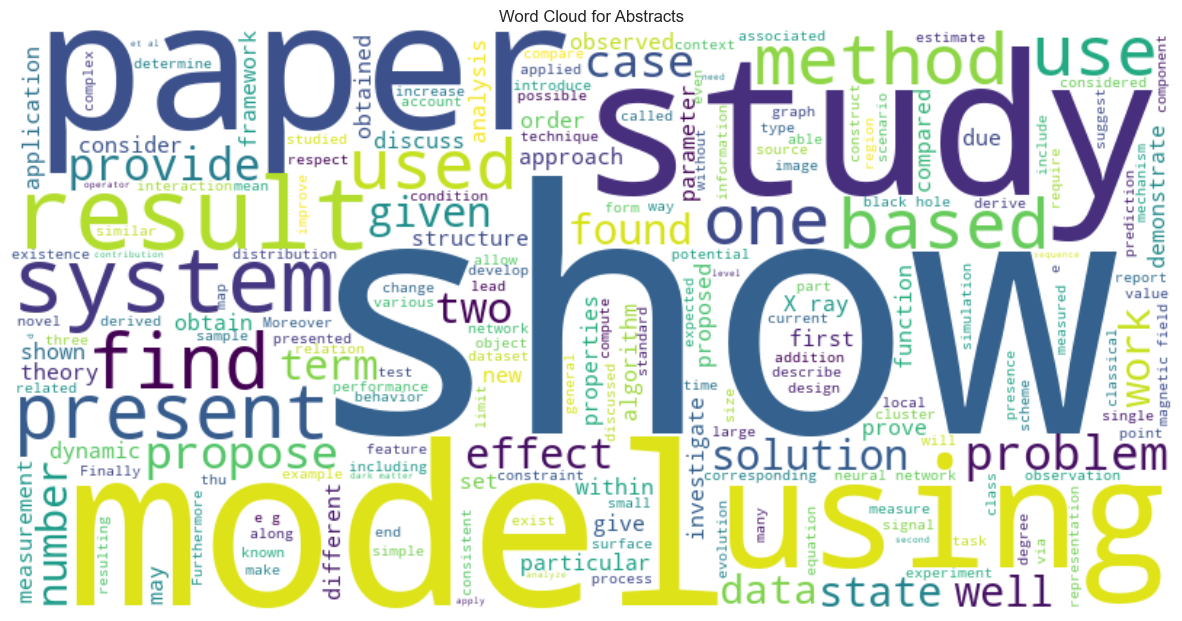

In [7]:
# Sample approximately 10% of abstracts
sample_abstracts = dataset.filter(lambda x: random.random() < 0.1).pluck("abstract").compute()
text = ' '.join(sample_abstracts)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Abstracts")
plt.savefig("../images/eda/InitialWordCloud.png")
plt.show()